In [68]:
import pandas as pd
import numpy as np

# 파일 로드
filename = 'myData/240325_0954_4line_I2C_verti.csv'

df = pd.read_csv(filename)
# cos, sin 값으로 theta 계산 (단위: 라디안)
# atan2 함수 사용
df['theta'] = np.arctan2(df['sin'], df['cos'])
df['theta'] = df['theta']/np.pi*180
# 데이터 확인
df.head()


,Force,z,cos,sin,sq,time,realz,realtheta,theta
0,2.37,28.90,-0.14,0.99,0.99,36496,30,90,98.049062
1,2.30,28.06,-0.13,1.00,1.01,36571,30,90,97.406912
2,2.31,26.96,-0.17,1.01,1.04,36646,30,90,99.554290
3,2.16,26.57,-0.17,1.01,1.05,36722,30,90,99.554290
4,2.15,24.86,-0.13,1.03,1.07,36797,30,90,97.193470


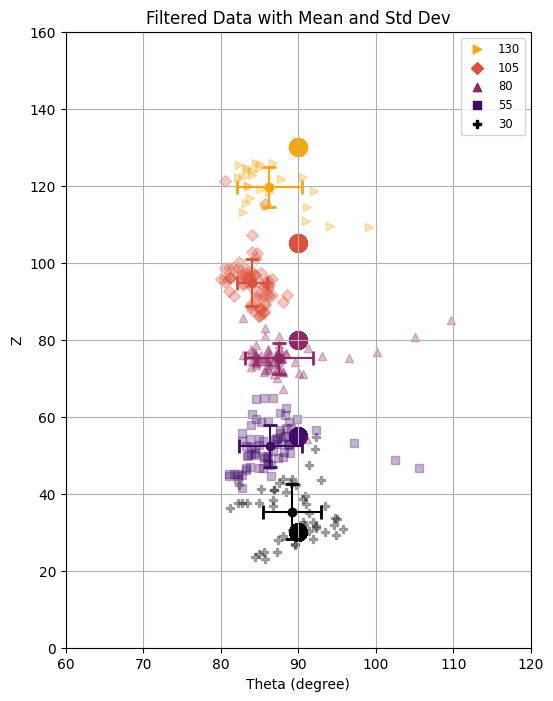

In [80]:
df['theta'] = np.arctan2(df['sin'], df['cos'])
df['theta'] = df['theta']/np.pi*180
df['theta'] -= 10
# 데이터 필터링: theta 값이 80에서 120 사이인 데이터만 선택

markers = ['P', 's', '^', 'D', '>', '*', 'P', 'X']


# color_map에 없는 값들에 대해 추가적인 색상을 자동으로 생성
unique_realz = df_filtered['realz'].unique()
colors = plt.cm.inferno(np.linspace(0, 0.8, len(unique_realz)))
color_map = dict(zip(unique_realz, colors))

# 각 realz 값별로 theta와 z의 평균 및 표준편차 계산
grouped_stats = df_filtered.groupby('realz').agg({'theta': ['mean', 'std'], 'z': ['mean', 'std']})

plt.figure(figsize=(6, 8))

# realz 기준으로 각 점을 그림, z와 theta의 범위를 제한. x 마커는 연하게 표시.
for (realz, group), marker in zip(df_filtered.groupby('realz'), markers):
    plt.scatter(group['theta'], group['z'], label=f'{realz}', color=color_map[realz], marker=marker, alpha=0.3)
    # 'realtheta', 'realz' 포인트에 대해서는 크기를 크게 하여 같은 마커 모양 사용
    plt.scatter(group['realtheta'], group['realz'], color=color_map[realz], s=150, marker='o')

# 평균과 표준편차를 에러바로 표현
for realz, stats in grouped_stats.iterrows():
    mean_theta, std_theta = stats[('theta', 'mean')], stats[('theta', 'std')]
    mean_z, std_z = stats[('z', 'mean')], stats[('z', 'std')]
    plt.errorbar(mean_theta, mean_z, xerr=std_theta, yerr=std_z, fmt='o', capsize=5, capthick=2, color=color_map[realz])

plt.xlabel('Theta (degree)')
plt.ylabel('Z')
plt.ylim(0,160)
plt.xlim(60,120)
plt.title('Filtered Data with Mean and Std Dev')

# 레전드 핸들과 라벨을 가져옴
handles, labels = plt.gca().get_legend_handles_labels()

# 레전드 순서를 반전하여 다시 그림
legend = plt.legend(handles[::-1], labels[::-1], markerscale=1, fontsize='small', loc='best')

 
for handle in legend.legend_handles:
    handle.set_alpha(1)  # 핸들(도형)의 투명도를 1(불투명)으로 설정

plt.grid(True)
plt.show()

In [82]:
# 각 realz 값별로 theta와 z의 평균 및 표준편차 계산
grouped_stats_corrected = df_filtered.groupby('realz').agg({'theta': ['mean', 'std'], 'z': ['mean', 'std']}).reset_index()

# 결과 출력
grouped_stats_corrected


realz      theta                     z          
              mean       std        mean       std
0    30  89.177355  3.707682   35.351600  7.220954
1    55  86.381662  4.069257   52.343380  5.477839
2    80  87.462719  4.389743   75.182466  3.963089
3   105  84.029848  1.929176   94.861642  6.015413
4   130  86.278143  4.222990  119.661154  5.194670

In [84]:
import pandas as pd

# 제공된 데이터를 DataFrame으로 생성
data = {
    'realz': [30, 55, 80, 105, 130],
    'theta_mean': [99.177355, 96.381662, 97.462719, 93.325842, 95.470148],
    'theta_std': [3.707682, 4.069257, 4.389743, 2.576572, 4.688689],
    'z_mean': [35.351600, 52.343380, 75.182466, 94.678831, 119.735517],
    'z_std': [7.220954, 5.477839, 3.963089, 5.629793, 4.944082]
}

df = pd.DataFrame(data)
df['theta_mean']-=10
# 실제 theta 값
real_theta = 90

# 절대 오차와 상대 오차 계산
df['theta_abs_error'] = abs(df['theta_mean'] - real_theta)
df['theta_rel_error'] = (df['theta_abs_error'] / real_theta) * 100

df['z_abs_error'] = abs(df['z_mean'] - df['realz'])
df['z_rel_error'] = (df['z_abs_error'] / df['realz']) * 100


df[['realz', 'theta_mean', 'theta_abs_error','z_mean', 'z_abs_error']]


,realz,theta_mean,theta_abs_error,z_mean,z_abs_error
0,30,89.177355,0.822645,35.351600,5.351600
1,55,86.381662,3.618338,52.343380,2.656620
2,80,87.462719,2.537281,75.182466,4.817534
3,105,83.325842,6.674158,94.678831,10.321169
4,130,85.470148,4.529852,119.735517,10.264483
